# Naive Bayes

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Naive Bayes model on the Training set

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


## Visualising the Training set results

<ipython-input-16-16cefe4299d1>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolormesh(xx, yy, Z)


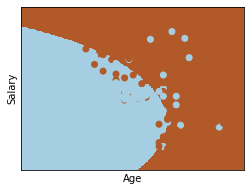

In [16]:
h = .02  #more less means more resolution 

''' Plot the decision boundary. For that, we will asign a color to each
 point in the mesh [x_min, m_max]x[y_min, y_max].'''
x_min, x_max = X_train[:,0].min() - .5, X_train[:,0].max() + .5  #keeping the .5 precesion so points dont touch the boundary
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  #using the meshgrid arguments to generate grid from the availble values
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X_train[:,0], X_train[:,1],c=y_train )
pl.xlabel('Age')
pl.ylabel('Salary')
pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()